In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Gogula Vinay\Desktop\Innomatics labs\Data Science\Pandas Class notes by vinay\iris.csv",names=['sepalLengthCm','sepalWidthCm','petalLengthCm','petalWidthCm','species'])

In [3]:
data

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.groupby('species').size() # Balanced dataset

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
data.shape

(150, 5)

In [6]:
datac=data.copy()

In [7]:
datac.head(2)

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [8]:
fvar=datac.drop(['species'],axis=1)

In [9]:
fvar.head()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
label=data[['species']]

In [11]:
label.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [12]:
lb=LabelEncoder()

In [13]:
label=lb.fit_transform(label['species'])

In [14]:
pd.Series(label)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(fvar,label,train_size=0.8)

In [17]:
x_train.shape   # it pics randomly

(105, 4)

In [18]:
y_train.shape

(105,)

In [19]:
x_test.shape

(45, 4)

In [20]:
y_test.shape

(45,)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn=KNeighborsClassifier(n_neighbors=1) # n_neighbors=1 same as k=1
model=knn.fit(x_train,y_train)  # Traing stage (takes all the datapoints and put in a grapth or memory or model which are having neighbores)

In [23]:
y_predict=model.predict(x_test) # testing stage

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy=accuracy_score(y_test,y_predict)

In [26]:
accuracy

0.9333333333333333

In [27]:
error =1-accuracy

In [28]:
error

0.06666666666666665

In [29]:
def acc(k):
    if k%2!=0:
        knn=KNeighborsClassifier(n_neighbors=k)
        model=knn.fit(x_train,y_train) 
        y_predict=model.predict(x_test)
        print('the accuracy for given k {} is'.format(k),accuracy_score(y_test,y_predict))
    else: print('enter odd value')

In [30]:
acc(5)

the accuracy for given k 5 is 0.9333333333333333


In [31]:
def acc(k):
    for i in range(k):
        if i%2!=0:
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(x_train,y_train) 
            y_predict=model.predict(x_test)
            print('The accuracy for given k {} is'.format(i),accuracy_score(y_test,y_predict))
        else:pass
acc(20)

The accuracy for given k 1 is 0.9333333333333333
The accuracy for given k 3 is 0.9333333333333333
The accuracy for given k 5 is 0.9333333333333333
The accuracy for given k 7 is 1.0
The accuracy for given k 9 is 1.0
The accuracy for given k 11 is 0.9555555555555556
The accuracy for given k 13 is 0.9777777777777777
The accuracy for given k 15 is 0.9555555555555556
The accuracy for given k 17 is 0.9555555555555556
The accuracy for given k 19 is 0.9555555555555556


In [32]:
# Crossvalidaton

In [33]:
x_train,x_test,y_train,y_test=train_test_split(fvar,label,train_size=0.8)
x_trainf,xcv,y_trainf,ycv=train_test_split(x_train,y_train,train_size=0.8)

In [34]:
ycv

array([2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1,
       2, 2])

In [35]:
x_trainf

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
149,5.9,3.0,5.1,1.8
112,6.8,3.0,5.5,2.1
83,6.0,2.7,5.1,1.6
73,6.1,2.8,4.7,1.2
44,5.1,3.8,1.9,0.4
...,...,...,...,...
33,5.5,4.2,1.4,0.2
71,6.1,2.8,4.0,1.3
6,4.6,3.4,1.4,0.3
106,4.9,2.5,4.5,1.7


In [36]:
xcv

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
133,6.3,2.8,5.1,1.5
128,6.4,2.8,5.6,2.1
11,4.8,3.4,1.6,0.2
119,6.0,2.2,5.0,1.5
104,6.5,3.0,5.8,2.2
89,5.5,2.5,4.0,1.3
105,7.6,3.0,6.6,2.1
88,5.6,3.0,4.1,1.3
10,5.4,3.7,1.5,0.2
19,5.1,3.8,1.5,0.3


In [37]:
y_trainf

array([2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1,
       2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2,
       0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 1, 0, 2, 0])

In [38]:
terror=[] #training error
kvalues=[]
def acc(k):
    for i in range(k):
        if i%2!=0:
            kvalues.append(i)
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(x_trainf,y_trainf) 
            y_predict=model.predict(x_trainf)
            terror.append(1-accuracy_score(y_trainf,y_predict))

In [39]:
acc(20)

In [40]:
terror


[0.0,
 0.04166666666666663,
 0.03125,
 0.03125,
 0.03125,
 0.04166666666666663,
 0.04166666666666663,
 0.03125,
 0.03125,
 0.04166666666666663]

In [41]:
kvalues

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [42]:
cverror=[] # Crossvalidation error 
kvalues=[]
def acc(k):
    for i in range(k):
        if i%2!=0:
            kvalues.append(i)
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(x_trainf,y_trainf) 
            y_predict=model.predict(xcv)
            #print('The error for given k {} is'.format(i),1-accuracy_score(ycv,ycv_predict))
            cverror.append(1-accuracy_score(ycv,y_predict))
acc(20)

In [43]:
cverror

[0.08333333333333337,
 0.08333333333333337,
 0.125,
 0.0,
 0.04166666666666663,
 0.04166666666666663,
 0.04166666666666663,
 0.04166666666666663,
 0.04166666666666663,
 0.04166666666666663]

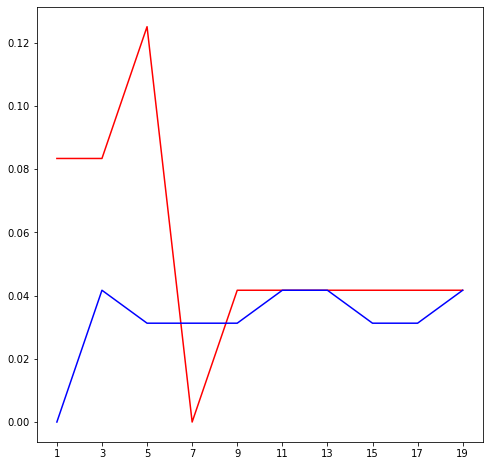

In [45]:
fig=plt.figure(figsize=(8,8))
plt.plot(kvalues,cverror,label="crossvalidation error",color='r')
plt.plot(kvalues,terror,label="Training error",color='b')
plt.xticks(kvalues)
plt.show()

In [46]:
[y for y in range(1,20,2)]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [49]:
#k=5 ----> therfore the best k thet found is 5


In [52]:
knn=KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x_trainf,y_trainf) 
y_predict=model.predict(x_test)
1-accuracy_score(y_test,y_predict)

0.033333333333333326

In [53]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [54]:
model.predict([[1.2,2.2,2.3,2.1]])

C:\Users\Gogula Vinay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# So setosa flower 

In [55]:
# K Fold

In [69]:
from sklearn.model_selection import KFold

In [70]:
k=KFold(n_splits=3)

In [71]:
for train_index,cv_index in k.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,cv_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
# these are the index value not the actial values

In [57]:
# K Fold method 2

In [58]:
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test=train_test_split(fvar,label,train_size=0.8)
accuracy=cross_val_score(KNeighborsClassifier(n_neighbors=1),x_train,y_train,cv=3)
finalaccuracy=np.mean(accuracy)
finalaccuracy

In [66]:
for k in range(1,20,2):
    x_train,x_test,y_train,y_test=train_test_split(fvar,label,train_size=0.8)
    print('for the given value of k={} the accuracy is {} whaen we have 3 fold'.format(k,np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1),x_train,y_train,cv=3))))
  
    

for the given value of k=1 the accuracy is 0.9583333333333334 whaen we have 3 fold
for the given value of k=3 the accuracy is 0.9583333333333334 whaen we have 3 fold
for the given value of k=5 the accuracy is 0.9583333333333334 whaen we have 3 fold
for the given value of k=7 the accuracy is 0.9249999999999999 whaen we have 3 fold
for the given value of k=9 the accuracy is 0.9583333333333334 whaen we have 3 fold
for the given value of k=11 the accuracy is 0.9499999999999998 whaen we have 3 fold
for the given value of k=13 the accuracy is 0.9499999999999998 whaen we have 3 fold
for the given value of k=15 the accuracy is 0.9583333333333334 whaen we have 3 fold
for the given value of k=17 the accuracy is 0.975 whaen we have 3 fold
for the given value of k=19 the accuracy is 0.9500000000000001 whaen we have 3 fold


In [ ]:
# K = 17 is good and we are getting 97% accuracy

In [ ]:
# decision surface

In [47]:
from mlxtend.plotting import plot_decision_regions

In [49]:
x_trainf

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
149,5.9,3.0,5.1,1.8
112,6.8,3.0,5.5,2.1
83,6.0,2.7,5.1,1.6
73,6.1,2.8,4.7,1.2
44,5.1,3.8,1.9,0.4
...,...,...,...,...
33,5.5,4.2,1.4,0.2
71,6.1,2.8,4.0,1.3
6,4.6,3.4,1.4,0.3
106,4.9,2.5,4.5,1.7


In [50]:
y_trainf

array([2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1,
       2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2,
       0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 1, 0, 2, 0])

<AxesSubplot:>

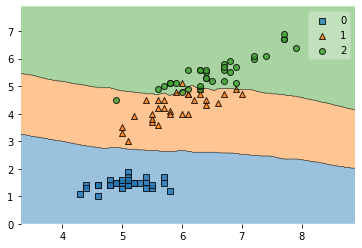

In [48]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_trainf.values[:,[0,2]],y_trainf)
plot_decision_regions(x_trainf.values[:,[0,2]],y_trainf,knn)

In [86]:
ushape=pd.read_csv(r"C:\Users\Gogula Vinay\Desktop\Innomatics labs\Data Science\Machine Learning\demo_data\1.ushape.csv",header=None)
ushape

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [90]:
ushape[2].astype(int).values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [93]:
ushape.values[:,[0,1]]

array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633,

<AxesSubplot:>

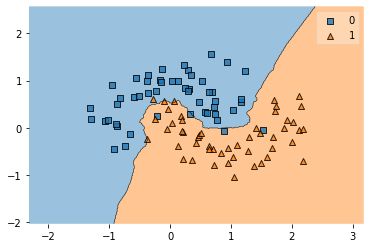

In [94]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(ushape.values[:,[0,1]],ushape[2].astype(int).values)
plot_decision_regions(ushape.values[:,[0,1]],ushape[2].astype(int).values,knn)